# Импорт библиотек

In [1]:
import pandas as pd
import sqlite3

import phik
from scipy.stats import shapiro

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from matplotlib import pyplot as plt
import seaborn as sns

import sqlite3

# 1.1 Загрузка данных

In [2]:
columns_dict = {
    'VendorID': 'Int32',
    'tpep_pickup_datetime': 'object',
    'tpep_pickup_datetime': 'object',
    'passenger_count': 'Int32',
    'trip_distance': 'float32',
    'RatecodeID': 'Int32',
    'store_and_fwd_flag': 'object',
    'PULocationID': 'Int32',
    'DOLocationID': 'Int32',
    'payment_type': 'Int32',
    'fare_amount': 'float32',
    'extra': 'float32',
    'mta_tax': 'float32',
    'tip_amount': 'float32',
    'tolls_amount': 'float32',
    'improvement_surcharge': 'float32',
    'total_amount': 'float32',
    'congestion_surcharge': 'object',
}

### Загрузка данных за 2019 год

In [66]:
taxi19_full = pd.read_csv('data/taxi19.csv', dtype=columns_dict, low_memory=True)

Оставим не менее 40% от исходного количества записей. В наборах данных для последующего обучения должны быть включены записи по каждому месяцу, присутствующему в исходных наборах, в пропорциональном количестве.

In [67]:
# Достаем месяц, день и год из даты
taxi19_full['tpep_pickup_datetime'] = pd.to_datetime(taxi19_full['tpep_pickup_datetime'], format="%m/%d/%Y %I:%M:%S %p")
taxi19_full['month'] = taxi19_full['tpep_pickup_datetime'].dt.month
taxi19_full['day'] = taxi19_full['tpep_pickup_datetime'].dt.day
taxi19_full['year'] = taxi19_full['tpep_pickup_datetime'].dt.year

Проверим пропорциональность данных по месяцам до обработки:

In [75]:
taxi19_full['month'].value_counts(normalize=True) * 100

NameError: name 'taxi19_full' is not defined

In [69]:
# Пропорциально берем 40 процентов из данных
taxi19 = taxi19_full.sample(frac=0.4, weights='month', random_state=1).reset_index(drop=True)

Проверим пропорциональность данных по месяцам после обработки:

In [74]:
taxi19['month'].value_counts(normalize=True) * 100

month
12    13.282129
11    12.596807
10    12.463915
9     10.600940
8      9.054597
7      8.562788
6      8.399311
5      7.940464
4      6.500841
3      5.357350
2      3.337981
1      1.902878
Name: proportion, dtype: float64

Данные по каждому месяцу присутствуют в пропорциональных количествах по сравнению с исходным набором.

Загрузим содержимое набора в базу данных, предусмотрим обработку исключений при загрузке

In [16]:
# Подключаемся к базе данных
con = sqlite3.connect('data/taxi.db')
try:
    taxi19.to_sql('taxi2019', con=con, if_exists='replace', index=False)
    print('Данные загружены в базу успешно!')
except Exception as e:
    print(f'Ошибка при загрузке базы данных: {e}')

Данные загружены в базу успешно!


In [71]:
# Отчищаем память от исходного датасета
del taxi19_full

###

### Загрузка данных за 2020 год

In [19]:
taxi20_full = pd.read_csv('data/taxi20.csv', dtype=columns_dict, low_memory=True)

Оставим не менее 40% от исходного количества записей. В наборах данных для последующего обучения должны быть включены записи по каждому месяцу, присутствующему в исходных наборах, в пропорциональном количестве.

In [20]:
# Достаем месяц, день и год из даты
taxi20_full['tpep_pickup_datetime'] = pd.to_datetime(taxi20_full['tpep_pickup_datetime'], format="%m/%d/%Y %I:%M:%S %p")
taxi20_full['month'] = taxi20_full['tpep_pickup_datetime'].dt.month
taxi20_full['day'] = taxi20_full['tpep_pickup_datetime'].dt.day
taxi20_full['year'] = taxi20_full['tpep_pickup_datetime'].dt.year

Проверим пропорциональность данных по месяцам до обработки:

In [21]:
taxi20_full['month'].value_counts(normalize=True) * 100

month
1     25.986158
2     25.557256
3     12.199291
10     6.820967
11     6.121671
12     5.931696
9      5.440055
8      4.086586
7      3.247378
6      2.230477
5      1.413352
4      0.965114
Name: proportion, dtype: float64

In [22]:
# Пропорциально берем 40 процентов из данных
taxi20 = taxi20_full.sample(frac=0.4, weights='month', random_state=1).reset_index(drop=True)

Проверим пропорциональность данных по месяцам после обработки:

In [23]:
taxi20['month'].value_counts(normalize=True) * 100

month
2     15.798375
10    12.920523
12    12.129835
11    12.098728
3     10.574102
9      9.803933
1      8.591740
8      6.939712
7      5.106619
6      3.194545
5      1.799268
4      1.042619
Name: proportion, dtype: float64

Данные по каждому месяцу присутствуют в пропорциональных количествах по сравнению с исходным набором.

Загрузим содержимое набора в базу данных, предусмотрим обработку исключений при загрузке.

In [24]:
# Подключаемся к базе данных
con = sqlite3.connect('data/taxi.db')
try:
    taxi20.to_sql('taxi20', con=con, if_exists='replace', index=False)
    print('Данные загружены в базу успешно!')
except Exception as e:
    print(f'Ошибка при загрузке базы данных: {e}')

con.close()

Данные загружены в базу успешно!


In [25]:
# Отчищаем память от исходного датасета
del taxi20_full

###

### Загрузка данных за 2021 год

In [26]:
taxi21_full = pd.read_csv('data/taxi21.csv', dtype=columns_dict, low_memory=True)

Оставим не менее 40% от исходного количества записей. В наборах данных для последующего обучения должны быть включены записи по каждому месяцу, присутствующему в исходных наборах, в пропорциональном количестве.

In [27]:
# Достаем месяц, день и год из даты
taxi21_full['tpep_pickup_datetime'] = pd.to_datetime(taxi21_full['tpep_pickup_datetime'], format="%m/%d/%Y %I:%M:%S %p")
taxi21_full['month'] = taxi21_full['tpep_pickup_datetime'].dt.month
taxi21_full['day'] = taxi21_full['tpep_pickup_datetime'].dt.day
taxi21_full['year'] = taxi21_full['tpep_pickup_datetime'].dt.year

Проверим пропорциональность данных по месяцам до обработки:

In [28]:
taxi21_full['month'].value_counts(normalize=True) * 100

month
11    11.237668
10    11.207212
12    10.401215
9      9.590254
6      9.170973
7      9.131101
8      9.022439
5      8.112446
4      7.025663
3      6.229383
2      4.438574
1      4.433073
Name: proportion, dtype: float64

In [29]:
# Пропорциально берем 40 процентов из данных
taxi21 = taxi21_full.sample(frac=0.4, weights='month', random_state=1).reset_index(drop=True)

Проверим пропорциональность данных по месяцам после обработки:

In [30]:
taxi21['month'].value_counts(normalize=True) * 100

month
11    15.516442
12    15.175443
10    14.508856
9     11.544910
8      9.977382
7      9.140300
6      8.131291
5      6.204999
4      4.450231
3      3.065915
2      1.506201
1      0.778029
Name: proportion, dtype: float64

Данные по каждому месяцу присутствуют в пропорциональных количествах по сравнению с исходным набором.

Загрузим содержимое набора в базу данных, предусмотрим обработку исключений при загрузке

In [31]:
# Подключаемся к базе данных
con = sqlite3.connect('data/taxi.db')
try:
    taxi21.to_sql('taxi2021', con=con, if_exists='replace', index=False)
    print('Данные загружены в базу успешно!')
except Exception as e:
    print(f'Ошибка при загрузке базы данных: {e}')

Данные загружены в базу успешно!


In [32]:
# Отчищаем память от исходного датасета
del taxi21_full

###

# 1.2 Предобработка данных и выделение значимых атрибутов

Для каждого набора данных (по годам) применим методы кластерного анализа для создания групп сходных объектов. Для кластеризации будем использовать метод KMeans. Этот метод требует только числовые отмасштабируемые признаки для входа, поэтому предобрабатываем данные.

Определим, какие атрибуты имеют наибольшее влияние на определение таких групп объектов. Используем Phik-корреляцию для обоснования взаимосвязи признаков на определение кластеров.

### Кластеризация данных за 2019 год

In [33]:
X19 = taxi19.drop(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

# Признаки для предобработки

cat_features = ['store_and_fwd_flag']
num_features = [col for col in X19.columns if col not in cat_features]
all_features = X19.columns

preprocess_str = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),]
)

preprocess_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),]
)

preprocess = ColumnTransformer([
    ('preprocess_str', preprocess_str, cat_features),
    ('preprocess_num', preprocess_num, num_features)
])

transformer = Pipeline(
    [
        ('preprocess', preprocess),
        ('scaler', StandardScaler())
    ]
)

X19 = pd.DataFrame(transformer.fit_transform(X19), columns = transformer.get_feature_names_out())
X19.columns = list(map(lambda x: x.split('__')[1], X19.columns))
X19.head()

,store_and_fwd_flag_N,store_and_fwd_flag_Y,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,day,year
0,0.097775,-0.097775,3.708911,-0.117887,-0.077234,1.106032,-1.227418,-0.603007,-0.065416,-0.108956,0.079286,0.010506,-0.214665,0.053058,-0.059480,0.319361,0.028781,0.056766,0.001685
1,0.097775,-0.097775,-0.464423,0.046795,-0.077234,1.121190,-1.953550,1.477047,0.030424,-0.897750,0.079286,-0.780591,-0.214665,0.053058,0.003226,0.319361,1.001835,-1.326789,0.001685
2,0.097775,-0.097775,-0.464423,-0.142414,-0.077234,-0.849402,-1.170467,1.477047,-0.065416,-0.503353,0.079286,-0.780591,-0.214665,0.053058,-0.112337,0.319361,-2.241681,-1.672678,0.001685
3,0.097775,-0.097775,-0.464423,-0.121391,-0.077234,-1.819540,0.979454,1.477047,-0.040195,-0.503353,0.079286,-0.780591,-0.214665,0.053058,-0.062093,0.319361,-0.295571,-0.980900,0.001685
4,0.097775,-0.097775,-0.464423,-0.098616,-0.077234,-0.030849,-0.273480,-0.603007,-0.050283,1.468631,0.079286,-0.080505,-0.214665,0.053058,-0.052044,0.319361,-0.944274,-1.442085,0.001685


In [34]:
# Кластеризация данных 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X19)
taxi19['cluster'] = kmeans.predict(X19)
X19['cluster'] = kmeans.predict(X19)

interval columns not set, guessing: ['store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'month', 'day', 'year', 'cluster']


<Axes: >

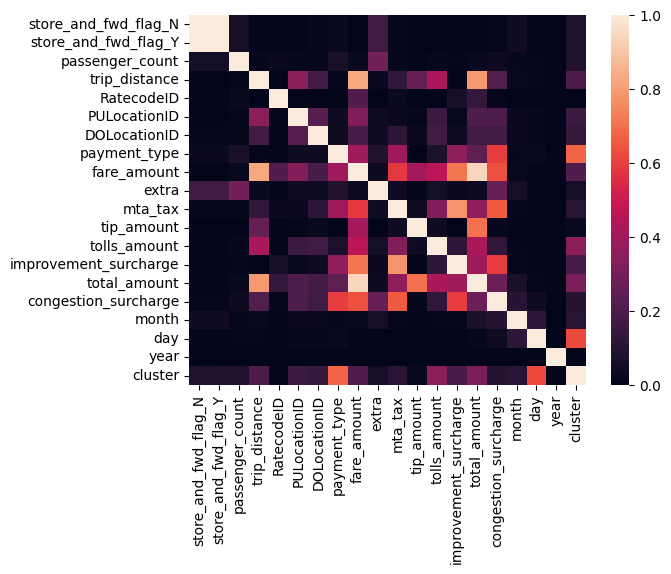

In [35]:
# Определим, какие атрибуты имеют наибольшее влияние на определение таких групп объектов.
corr19 = X19.sample(frac=0.01).phik_matrix()
sns.heatmap(corr19)

In [36]:
corr19['cluster'].sort_values(ascending=False).head(8)

cluster                  1.000000
payment_type             0.672001
day                      0.618757
tolls_amount             0.345522
total_amount             0.308815
fare_amount              0.210735
trip_distance            0.202073
improvement_surcharge    0.190225
Name: cluster, dtype: float64

Самыми значимыми атрибутами стали:
- passenger_count          
- tip_amount               
- payment_type             
- extra                    
- improvement_surcharge    
- mta_tax                  
- store_and_fwd_flag

###

### Кластеризация данных за 2020 год

In [37]:
X20 = taxi20.drop(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

# Признаки для предобработки

cat_features = ['store_and_fwd_flag']
num_features = [col for col in X20.columns if col not in cat_features]
all_features = X20.columns

preprocess_str = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),]
)

preprocess_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),]
)

preprocess = ColumnTransformer([
    ('preprocess_str', preprocess_str, cat_features),
    ('preprocess_num', preprocess_num, num_features)
])

transformer = Pipeline(
    [
        ('preprocess', preprocess),
        ('scaler', StandardScaler())
    ]
)

X20 = pd.DataFrame(transformer.fit_transform(X20), columns = transformer.get_feature_names_out())
X20.columns = list(map(lambda x: x.split('__')[1], X20.columns))
X20.head()

,store_and_fwd_flag_N,store_and_fwd_flag_Y,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,day,year
0,0.099655,-0.099655,-0.393263,-0.001770,-0.054759,-1.419390,-0.272758,-0.568860,-0.006915,-0.817383,0.096143,0.374606,-0.187758,0.068632,-0.002059,0.380095,0.275194,1.475776,0.002404
1,0.099655,-0.099655,-0.393263,-0.006980,-0.054759,-1.419390,-1.571000,-0.568860,-0.053968,1.624008,0.096143,-0.138748,-0.187758,0.068632,-0.054499,0.380095,1.036758,-1.034732,0.002404
2,0.099655,-0.099655,-0.393263,0.026494,4.164598,1.039406,1.458232,1.498685,0.238435,1.624008,0.096143,-0.785339,-0.187758,0.068632,0.226502,0.380095,-1.501786,-1.605301,0.002404
3,0.099655,-0.099655,-0.393263,-0.002923,-0.054759,1.083842,-1.291808,-0.568860,-0.010276,-0.003586,0.096143,1.013360,-0.187758,0.068632,0.012243,0.380095,-0.232514,1.247548,0.002404
4,0.099655,-0.099655,-0.393263,0.012240,-0.054759,-0.382548,0.020394,-0.568860,0.097275,-0.817383,0.096143,3.384196,8.140620,0.068632,0.235768,0.380095,-1.247932,0.905206,0.002404


In [38]:
# Кластеризация данных 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X20)
taxi20['cluster'] = kmeans.predict(X20)
X20['cluster'] = kmeans.predict(X20)

interval columns not set, guessing: ['store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'month', 'day', 'year', 'cluster']


<Axes: >

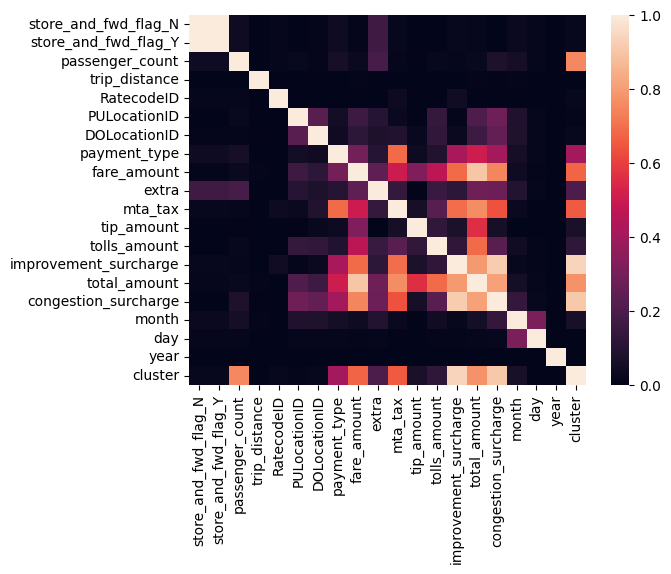

In [39]:
# Определим, какие атрибуты имеют наибольшее влияние на определение таких групп объектов.
corr20 = X20.sample(frac=0.01).phik_matrix()
sns.heatmap(corr20)

In [40]:
corr20['cluster'].sort_values(ascending=False).head(8)

cluster                  1.000000
improvement_surcharge    0.938091
congestion_surcharge     0.906921
total_amount             0.775532
passenger_count          0.753678
fare_amount              0.674974
mta_tax                  0.654391
payment_type             0.407899
Name: cluster, dtype: float64

Самыми значимыми атрибутами стали:
- passenger_count          
- tip_amount               
- payment_type             
- extra                    
- improvement_surcharge    
- mta_tax                  
- store_and_fwd_flag

###

### Кластеризация данных за 2021 год

In [41]:
X21 = taxi21.drop(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

# Признаки для предобработки

cat_features = ['store_and_fwd_flag']
num_features = [col for col in X21.columns if col not in cat_features]
all_features = X21.columns

preprocess_str = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),]
)

preprocess_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),]
)

preprocess = ColumnTransformer([
    ('preprocess_str', preprocess_str, cat_features),
    ('preprocess_num', preprocess_num, num_features)
])

transformer = Pipeline(
    [
        ('preprocess', preprocess),
        ('scaler', StandardScaler())
    ]
)

X21 = pd.DataFrame(transformer.fit_transform(X21), columns = transformer.get_feature_names_out())
X21.columns = list(map(lambda x: x.split('__')[1], X21.columns))
X21.head()

,store_and_fwd_flag_N,store_and_fwd_flag_Y,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,day,year
0,0.120779,-0.120779,3.54735,-0.001805,-0.04562,0.986609,0.051136,-0.415822,0.026598,-0.436799,0.100987,0.804299,-0.220765,0.069489,0.036195,0.29694,0.159135,-0.987666,0.001677
1,0.120779,-0.120779,1.57016,-0.003144,-0.04562,0.986609,1.396463,-0.415822,0.024453,-0.834772,0.100987,1.128059,-0.220765,0.069489,0.035938,0.29694,0.885482,-0.528249,0.001677
2,0.120779,-0.120779,-0.40703,-0.006759,-0.04562,-0.359500,-0.274575,-0.415822,-0.016302,-0.834772,0.100987,0.081005,-0.220765,0.069489,-0.017819,0.29694,-2.746251,-1.561938,0.001677
3,0.120779,-0.120779,-0.40703,-0.008319,-0.04562,0.018620,-0.161284,1.578496,-0.033462,-0.436799,0.100987,-0.835167,-0.220765,0.069489,-0.054943,-3.08758,-0.204038,-1.561938,0.001677
4,0.120779,-0.120779,-0.40703,-0.007587,-0.04562,-1.130866,-2.243001,1.578496,-0.012012,-0.834772,0.100987,-0.835167,-0.220765,0.069489,-0.024935,0.29694,-0.930384,-1.217375,0.001677


In [42]:
# Кластеризация данных 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X21)
taxi21['cluster'] = kmeans.predict(X21)
X21['cluster'] = kmeans.predict(X21)

interval columns not set, guessing: ['store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'month', 'day', 'year', 'cluster']


<Axes: >

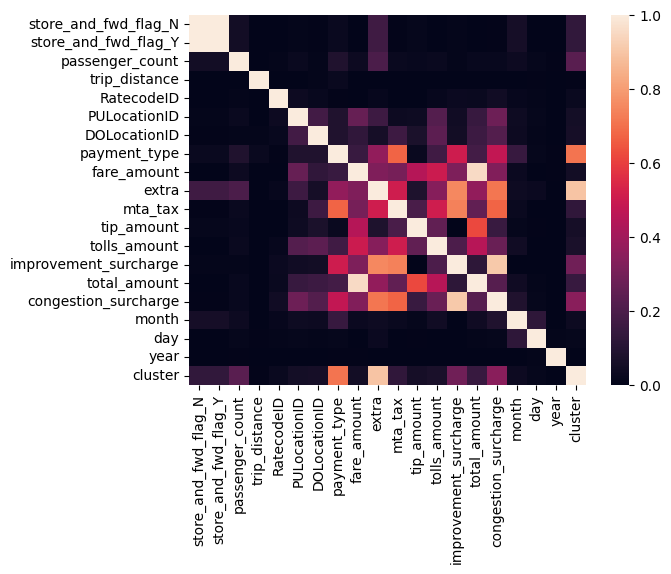

In [43]:
# Определим, какие атрибуты имеют наибольшее влияние на определение таких групп объектов.
corr21 = X21.sample(frac=0.01).phik_matrix()
sns.heatmap(corr21)

In [44]:
corr21['cluster'].sort_values(ascending=False).head(8)

cluster                  1.000000
extra                    0.896128
payment_type             0.707371
congestion_surcharge     0.345591
improvement_surcharge    0.286736
passenger_count          0.233195
total_amount             0.145945
store_and_fwd_flag_N     0.132154
Name: cluster, dtype: float64

Самыми значимыми атрибутами стали:
- passenger_count          
- tip_amount               
- payment_type             
- extra                    
- improvement_surcharge    
- mta_tax                  
- store_and_fwd_flag

###

In [45]:
selected_columns = ['passenger_count', 'tip_amount', 'payment_type', 'extra', 'improvement_surcharge', 'mta_tax', 'store_and_fwd_flag']

#

# 1.3 Описание структуры набора данных

Для каждого атрибута подготовим описание, содержащее текстовое представление. Также проведем статистические и графические оценки данных. Возьмем данные за 2020 год, так как в годах разница в данных незначительна.

In [47]:
col_text = {
    'passenger_count': 'Количество пассажиров',
    'tip_amount': 'Размер чаевых',
    'payment_type': 'Тип оплаты',
    'extra': 'Дополнительные поступления',
    'improvement_surcharge': 'Сервисный сбор',
    'mta_tax': 'Налоговый сбор',
    'store_and_fwd_flag': 'Этот флаг указывает, хранилась ли запись о поездке в памяти транспортного средства перед отправкой продавцу.',
}

Атрибут passenger_count: Количество пассажиров
Пустых значений: 494354


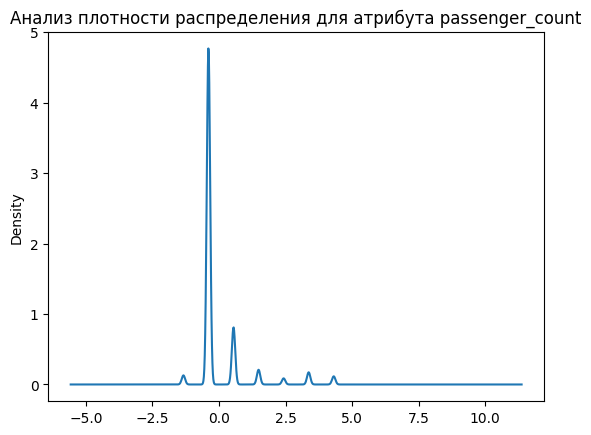

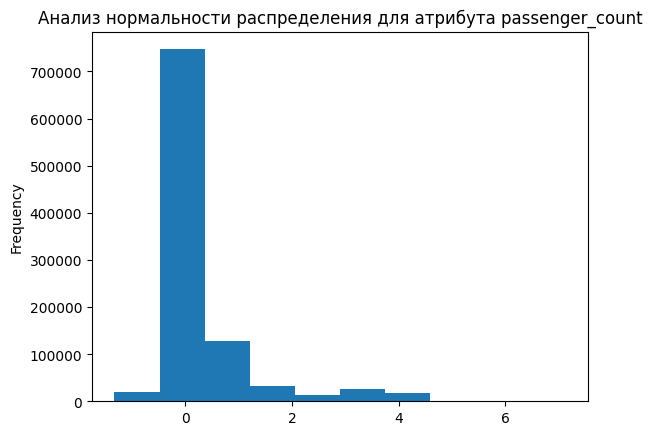

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9365046.
  res = hypotest_fun_out(*samples, **kwds)


Статистика: 0.5434815150809156
p-value: 8.879781260066691e-218
Распределение ненормально




Атрибут tip_amount: Размер чаевых
Пустых значений: 0


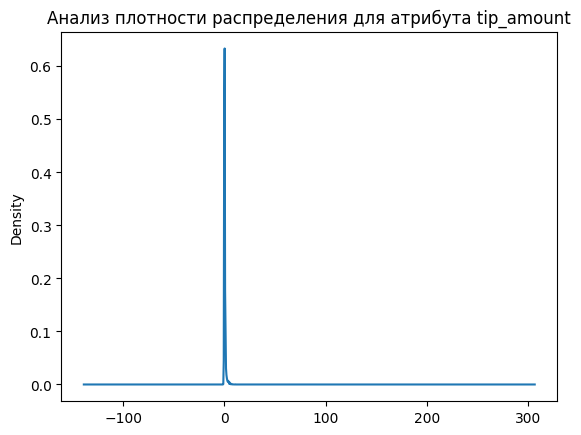

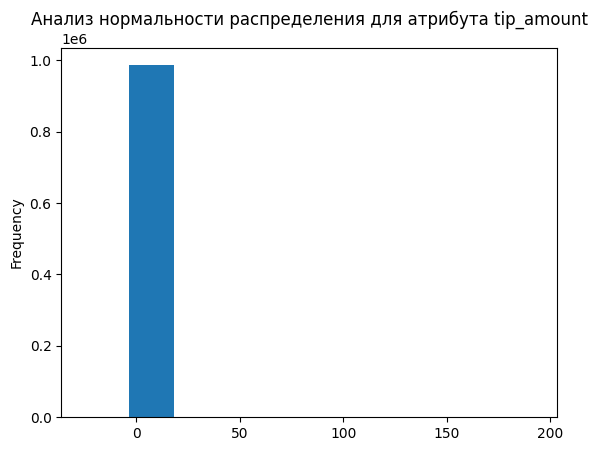

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9365046.
  res = hypotest_fun_out(*samples, **kwds)


Статистика: 0.5434815150809156
p-value: 8.879781260066691e-218
Распределение ненормально




Атрибут payment_type: Тип оплаты
Пустых значений: 494354


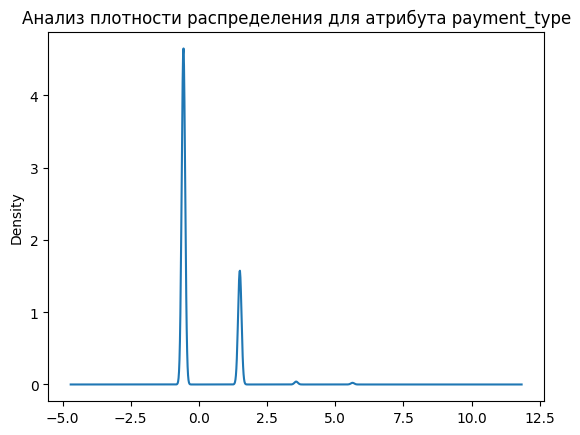

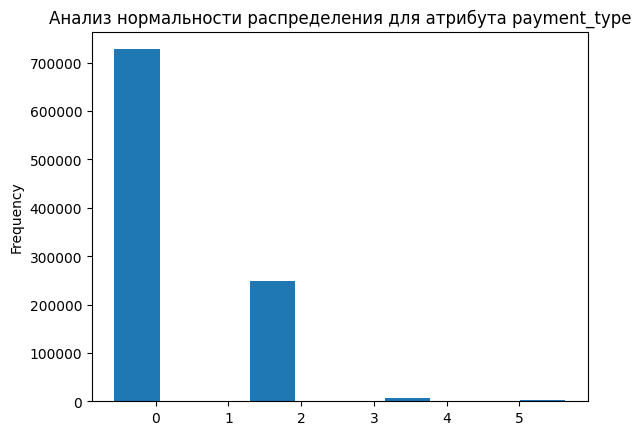

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9365046.
  res = hypotest_fun_out(*samples, **kwds)


Статистика: 0.5434815150809156
p-value: 8.879781260066691e-218
Распределение ненормально




Атрибут extra: Дополнительные поступления
Пустых значений: 0


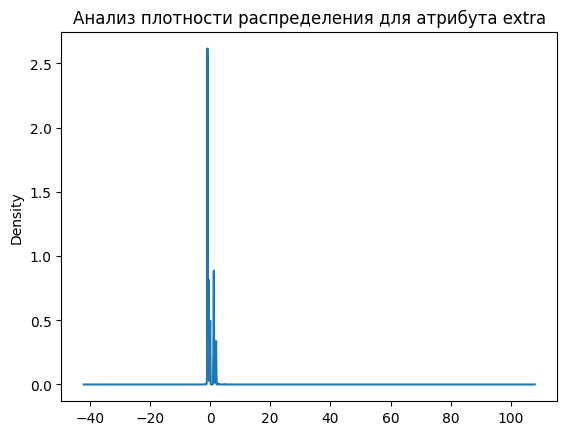

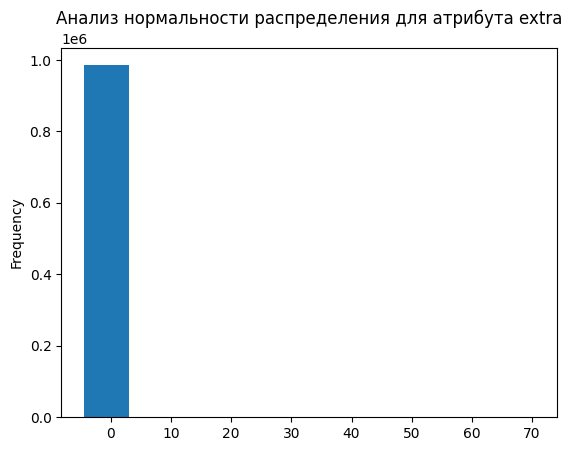

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9365046.
  res = hypotest_fun_out(*samples, **kwds)


Статистика: 0.5434815150809156
p-value: 8.879781260066691e-218
Распределение ненормально




Атрибут improvement_surcharge: Сервисный сбор
Пустых значений: 0


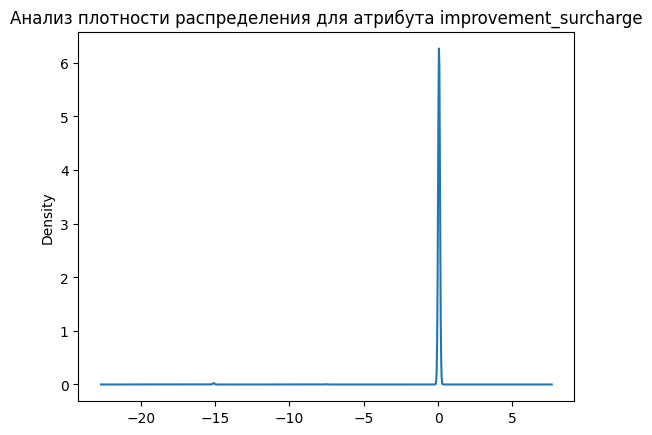

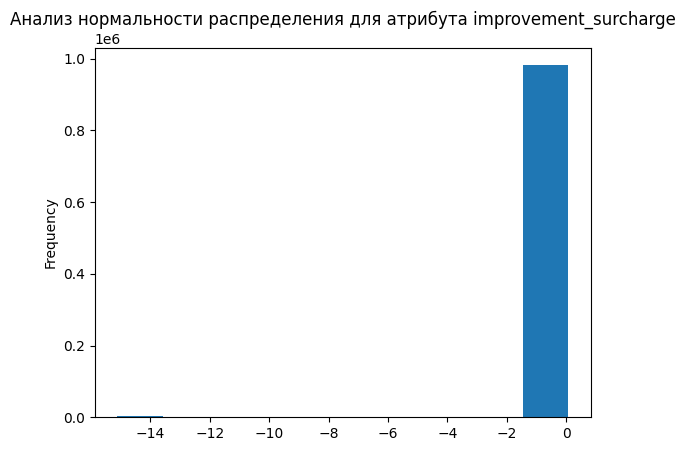

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9365046.
  res = hypotest_fun_out(*samples, **kwds)


Статистика: 0.5434815150809156
p-value: 8.879781260066691e-218
Распределение ненормально




Атрибут mta_tax: Налоговый сбор
Пустых значений: 0


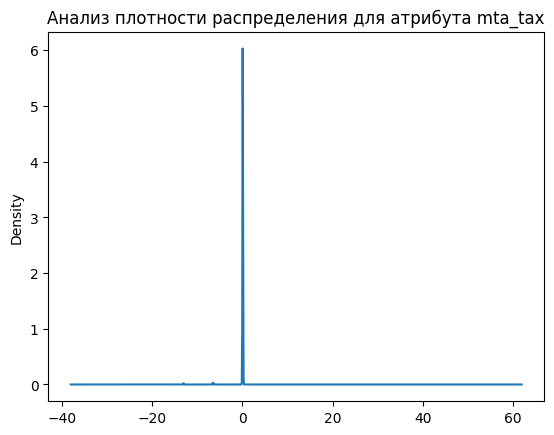

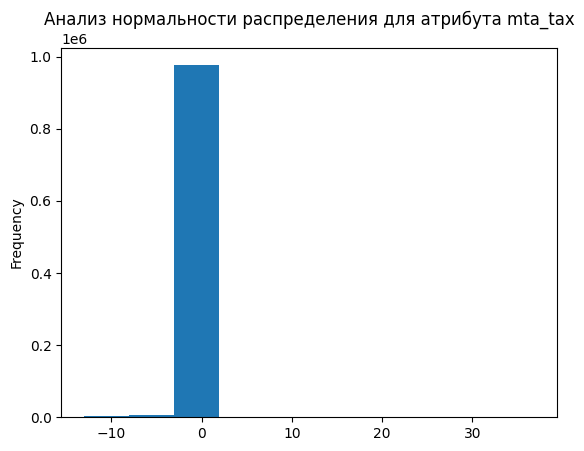

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9365046.
  res = hypotest_fun_out(*samples, **kwds)


Статистика: 0.5434815150809156
p-value: 8.879781260066691e-218
Распределение ненормально




Атрибут store_and_fwd_flag: Этот флаг указывает, хранилась ли запись о поездке в памяти транспортного средства перед отправкой продавцу.
Пустых значений: 494354


In [48]:
for col in selected_columns:
    
    print(f'Атрибут {col}: {col_text[col]}')
    print(f'Пустых значений: {taxi20[col].isna().sum()}')
    if taxi20[col].dtype == 'O':
        continue
    
    X20[col].sample(frac=0.1).plot.kde()
    plt.title(f'Анализ плотности распределения для атрибута {col}')
    plt.show()
    
    # графическая оценка распределения 
    X20[col].sample(frac=0.1).plot.hist()
    plt.title(f'Анализ нормальности распределения для атрибута {col}')
    plt.show()
    
    # статистическая оценка распределения, нормальности распределения данных
    stats, p = shapiro(taxi20['passenger_count'], nan_policy='omit')
    # Вывод о типе распределения
    print(f'Статистика: {stats}\np-value: {p}')
    if p < 0.05:
        print('Распределение ненормально')
    else:
        print('Распределение нормально')
    print('\n\n\n')

# 1.4 Определение численных характеристик наборов данных

1)	Средний по районам процент чаевых, оставленных пассажирами в поездках, длительность которых превышала 20% и не превышала 80% от максимальной длительности, от оплаты проезда;

2019

In [76]:
# Удаляем выбросы
taxi19 = taxi19[taxi19['trip_distance'] < 500]

min_distance = 0.2 * taxi19['trip_distance'].max()
max_distance = 0.8 * taxi19['trip_distance'].max()

temp = taxi19.loc[(taxi19['trip_distance'] > min_distance) & (taxi19['trip_distance'] < max_distance)].copy()

temp.loc[:, 'tip_proportion'] = temp.loc[:, 'tip_amount'] / temp.loc[:, 'total_amount']

result = temp.groupby('PULocationID')['tip_proportion'].mean() * 100
result

PULocationID
7       0.000000
10      6.917893
13      0.000000
14      0.000000
24     16.665970
         ...    
249    12.578860
252     4.992506
263     0.000000
264     5.158449
265     7.902867
Name: tip_proportion, Length: 90, dtype: float32

2020

In [78]:
# Удаляем выбросы
taxi20 = taxi20[taxi20['trip_distance'] < 500]

min_distance = 0.2 * taxi20['trip_distance'].max()
max_distance = 0.8 * taxi20['trip_distance'].max()

temp = taxi20.loc[(taxi20['trip_distance'] > min_distance) & (taxi20['trip_distance'] < max_distance)].copy()

temp.loc[:, 'tip_proportion'] = temp.loc[:, 'tip_amount'] / temp.loc[:, 'total_amount']

result = temp.groupby('PULocationID')['tip_proportion'].mean() * 100
result

PULocationID
4      12.499700
13      0.000000
14      0.000000
18     11.071149
43      2.298586
45     16.666811
48      3.217744
62      0.000000
65     19.354893
68      9.523420
74      0.000000
75      0.000000
79     16.666540
89      3.693754
91     16.583765
92      0.000000
94     16.604467
98     16.666668
100     6.666258
102    16.652622
107    23.075983
114    18.332331
115     0.000000
118     0.000000
132     4.780045
133     0.000000
138     6.673913
140     0.000000
141     0.000000
148    12.858603
151     0.000000
154     5.134934
161     0.000000
163     0.000000
170     3.333245
181    16.666044
186     9.362495
189    16.666855
209     0.000000
216     0.000000
218     4.180602
219    16.585667
229     3.536068
230     0.008455
231    33.333336
233     0.000000
234     0.000000
236          NaN
237     0.000000
239     0.000000
244     0.000000
246    16.666374
252     0.000000
262     0.000000
263     0.000000
264     0.000000
265     7.879946
Name: tip_proporti

2021

In [80]:
# Удаляем выбросы
taxi21 = taxi21[taxi21['trip_distance'] < 500]

min_distance = 0.2 * taxi21['trip_distance'].max()
max_distance = 0.8 * taxi21['trip_distance'].max()

temp = taxi21.loc[(taxi21['trip_distance'] > min_distance) & (taxi21['trip_distance'] < max_distance)].copy()

temp.loc[:, 'tip_proportion'] = temp.loc[:, 'tip_amount'] / temp.loc[:, 'total_amount']

result

PULocationID
4      12.499700
13      0.000000
14      0.000000
18     11.071149
43      2.298586
45     16.666811
48      3.217744
62      0.000000
65     19.354893
68      9.523420
74      0.000000
75      0.000000
79     16.666540
89      3.693754
91     16.583765
92      0.000000
94     16.604467
98     16.666668
100     6.666258
102    16.652622
107    23.075983
114    18.332331
115     0.000000
118     0.000000
132     4.780045
133     0.000000
138     6.673913
140     0.000000
141     0.000000
148    12.858603
151     0.000000
154     5.134934
161     0.000000
163     0.000000
170     3.333245
181    16.666044
186     9.362495
189    16.666855
209     0.000000
216     0.000000
218     4.180602
219    16.585667
229     3.536068
230     0.008455
231    33.333336
233     0.000000
234     0.000000
236          NaN
237     0.000000
239     0.000000
244     0.000000
246    16.666374
252     0.000000
262     0.000000
263     0.000000
264     0.000000
265     7.879946
Name: tip_proporti

Вывод: в целом для всех годов ситуация похожая, примерно в поовине районов клиенты никогда не платят чаевые.

2)	Количество поездок, расстоянием не менее 1 км, при которых стоимость на километр не превышала наиболее вероятную стоимость на километр поездок по такому же тарифу для каждого способа оплаты;

2019

In [52]:
temp = taxi19.copy()

# средняя стоимость по тарифу
mean_ratecode = temp.groupby('RatecodeID')['total_amount'].mean().reset_index()
temp = temp.merge(mean_ratecode, on='RatecodeID')

temp = temp[(temp['trip_distance'] > 1) & (temp['total_amount_x'] < temp['total_amount_y'])]
temp.groupby('payment_type')['VendorID'].count()

payment_type
1    8821906
2    4213095
3      53054
4      27720
Name: VendorID, dtype: Int64

2020

In [53]:
temp = taxi20.copy()

# средняя стоимость по тарифу
mean_ratecode = temp.groupby('RatecodeID')['total_amount'].mean().reset_index()
temp = temp.merge(mean_ratecode, on='RatecodeID')

temp = temp[(temp['trip_distance'] > 1) & (temp['total_amount_x'] < temp['total_amount_y'])]
temp.groupby('payment_type')['VendorID'].count()

payment_type
1    2457839
2    1092529
3      16800
4      14329
5          3
Name: VendorID, dtype: Int64

2021

In [54]:
temp = taxi21.copy()

# средняя стоимость по тарифу
mean_ratecode = temp.groupby('RatecodeID')['total_amount'].mean().reset_index()
temp = temp.merge(mean_ratecode, on='RatecodeID')

temp = temp[(temp['trip_distance'] > 1) & (temp['total_amount_x'] < temp['total_amount_y'])]
temp.groupby('payment_type')['VendorID'].count()

payment_type
1    3758314
2    1292180
3      16950
4      21592
Name: VendorID, dtype: Int64

Вывод: в 2020 году видно уменьшение поездок для всех тарифов, но особенно для тарифа под номером 5, возможно это связано с низкими доходами населения в период пандемии, в 2021 количестов поездок снова увеличивается

3)	Пять самых популярных районов, в которых высаживались люди, совершавшие поездки вместе в количестве меньше среднего количества человек на поездку, расположенных в порядке убывания средней стоимости поездки.

2019

In [55]:
temp = taxi19.copy()

mean_passenger = temp['passenger_count'].mean()

# Самые популярные районы
popular_loc = temp[temp['passenger_count'] < mean_passenger].groupby('DOLocationID')['VendorID'].count().sort_values(ascending=False).head(5).index
# Сортировка по средней стоимости проезда
temp[temp['DOLocationID'].isin(popular_loc)].groupby('DOLocationID')['total_amount'].mean().sort_values(ascending=False)

DOLocationID
162    17.438358
161    17.111450
170    16.852257
236    14.976151
237    14.610186
Name: total_amount, dtype: float32

2020

In [56]:
temp = taxi20.copy()

mean_passenger = temp['passenger_count'].mean()

# Самые популярные районы
popular_loc = temp[temp['passenger_count'] < mean_passenger].groupby('DOLocationID')['VendorID'].count().sort_values(ascending=False).head(5).index
# Сортировка по средней стоимости проезда
temp[temp['DOLocationID'].isin(popular_loc)].groupby('DOLocationID')['total_amount'].mean().sort_values(ascending=False)

DOLocationID
170    15.004441
161    14.730945
141    14.498120
236    14.261866
237    13.769765
Name: total_amount, dtype: float32

2021

In [57]:
temp = taxi21.copy()

mean_passenger = temp['passenger_count'].mean()

# Самые популярные районы
popular_loc = temp[temp['passenger_count'] < mean_passenger].groupby('DOLocationID')['VendorID'].count().sort_values(ascending=False).head(5).index
# Сортировка по средней стоимости проезда
temp[temp['DOLocationID'].isin(popular_loc)].groupby('DOLocationID')['total_amount'].mean().sort_values(ascending=False)

DOLocationID
170    16.656109
161    16.295759
141    15.830980
236    15.468306
237    14.776616
Name: total_amount, dtype: float32

Вывод: в целом, самые популярные районы остаются в топе все 3 года, но самая большая средняя стоимость поездки в 2019 году, потом, из-за снижения спроса на такси, снижается и цена на поездку, со временем в 2021 году спрос снова увеличивается и поднимаем цену на такси

# 1.5 Подготовка отчета

В ходе модуля А была проделана следующая работа:
- Загрузка данных из источника
- Предобработка данных и выделение значимых атрибутов
- Описание структуры набора данных
- Определение численных характеристик наборов данных
- Подготовлен отчет

In [81]:
# Выгружаем данные для следующих модулей
taxi19.to_csv('data/taxi19_preprocess.csv', index=False)
taxi20.to_csv('data/taxi20_preprocess.csv', index=False)
taxi21.to_csv('data/taxi21_preprocess.csv', index=False)